In [9]:
import numpy as np
import scipy 
import os
import matplotlib.pyplot as plot
import math
from scipy import ndimage
from skimage import io

plot.rcParams['image.interpolation'] = 'nearest'
plot.rcParams['image.cmap'] = 'gray'

Zero padding changes shape of inputs to conform to expected shapes

x shape (num examples, height, width, 3)

In [10]:
def zeroPadding(x,pad_size): 
    x = np.pad(x, ((0, 0), (pad_size, pad_size), (pad_size, pad_size), (0,0)), "constant" )
    return x 

x (4, 3, 3, 2)
PaddedX (4, 9, 9, 2)


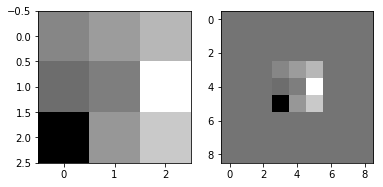

In [18]:
np.random.seed(17)
x = np.random.randn(4,3,3,2)
paddedX = zeroPadding(x,3)
print("x",x.shape)
print("PaddedX",paddedX.shape)

figure, array = plot.subplots(1, 2)
array[0].imshow(x[0, :, :, 0])
#plot.show()
array[1].imshow(paddedX[0, :, :, 0])
plot.show()

In [46]:
def convolution(x, w, b):
    # x.shape == (f, f, number of channels in previous layer)
    # w.shape == (f, f, number of channels in previous layer)
    # b.shape == (1, 1, 1)
    z = x * w 
    z = np.sum(z) + float(b)
    return z  

In [56]:
np.random.seed(17)
x = np.random.randn(4,4,3)
w = np.random.randn(4,4,3)
b = np.random.randn(1,1,1)
z = convolution(x,w,b)
print("z",z)

z 2.39921868021


z = 28.7210842132

In [117]:
def convolveFoward(x, weights, b, stride_length, pad_value):
    num_examples, height, width, pre_channels = np.shape(x)
    window_side_length, window_side_length, pre_channels, cur_channels = np.shape(weights)
    # Equation to compute new height and width dimensions
    new_height = int((height + 2 * pad_value - window_side_length) / stride_length) + 1
    new_width = int((width + 2 * pad_value - window_side_length) / stride_length) + 1
    z = np.zeros((num_examples, new_height, new_width, cur_channels)) #new channels for z shape
    #z is placeholders for output
    z = zeroPadding(z,pad_value)
    print("widths",new_width * window_side_length, width)
    for i in range(num_examples):
        curr_example = x[i]
        for h in range(new_height): #iterating through new heigth of layer dimensions
            for w in range(new_width): #iterating through new width of layer dimensions
                for c in range(cur_channels):
                    #fetches current widow to convolve
                    h_start = h * stride_length
                    h_end = h_start + window_side_length
                    print("h",h_start,h_end)
                    w_start = w * stride_length
                    w_end = w_start + window_side_length
                    print("curr w: ", w)
                    print("w-start/end",w_start,w_end)
                    cur_slice = curr_example[h_start:h_end, w_start:w_end, :]
                    
                    if 0 in cur_slice.shape:
                        print("current example shape: ", curr_example.shape)
                        print("indexes",h_start,h_end, w_start,w_end)
                        print("current example: ")
                        print(curr_example)
                        print("Slice shape", cur_slice.shape)
                    
                    cur_z = convolution(cur_slice,weights[:,:,:,c], b[:,:,:,c])
                    z[i,h,w,c] = cur_z

    cache = {"w":w,"b":b,"x":x, "stride_length":stride_length,"pad_value":pad_value}
    return z, cache

In [116]:
np.random.seed(1)
x = np.random.randn(10,4,4,3)
# weights (window_side_length, widnow_side_length, num channels in previous layer, new num channels)
weights = np.random.randn(2,2,3,8)
biases = np.random.randn(1,1,1,8)
pad_value = 2
stride_length = 2
z,_ = convolveFoward(x,weights, biases, stride_length, pad_value)
print("z shape",np.shape(z))
print("mean",np.mean(z))



widths 8 4
h 0 2
curr w:  0
w-start/end 0 2
h 0 2
curr w:  0
w-start/end 0 2
h 0 2
curr w:  0
w-start/end 0 2
h 0 2
curr w:  0
w-start/end 0 2
h 0 2
curr w:  0
w-start/end 0 2
h 0 2
curr w:  0
w-start/end 0 2
h 0 2
curr w:  0
w-start/end 0 2
h 0 2
curr w:  0
w-start/end 0 2
h 0 2
curr w:  1
w-start/end 2 4
h 0 2
curr w:  1
w-start/end 2 4
h 0 2
curr w:  1
w-start/end 2 4
h 0 2
curr w:  1
w-start/end 2 4
h 0 2
curr w:  1
w-start/end 2 4
h 0 2
curr w:  1
w-start/end 2 4
h 0 2
curr w:  1
w-start/end 2 4
h 0 2
curr w:  1
w-start/end 2 4
h 2 4
curr w:  0
w-start/end 0 2
h 2 4
curr w:  0
w-start/end 0 2
h 2 4
curr w:  0
w-start/end 0 2
h 2 4
curr w:  0
w-start/end 0 2
h 2 4
curr w:  0
w-start/end 0 2
h 2 4
curr w:  0
w-start/end 0 2
h 2 4
curr w:  0
w-start/end 0 2
h 2 4
curr w:  0
w-start/end 0 2
h 2 4
curr w:  1
w-start/end 2 4
h 2 4
curr w:  1
w-start/end 2 4
h 2 4
curr w:  1
w-start/end 2 4
h 2 4
curr w:  1
w-start/end 2 4
h 2 4
curr w:  1
w-start/end 2 4
h 2 4
curr w:  1
w-start/end 2 4

curr w:  1
w-start/end 2 4
h 0 2
curr w:  1
w-start/end 2 4
h 0 2
curr w:  1
w-start/end 2 4
h 0 2
curr w:  1
w-start/end 2 4
h 0 2
curr w:  1
w-start/end 2 4
h 0 2
curr w:  1
w-start/end 2 4
h 2 4
curr w:  0
w-start/end 0 2
h 2 4
curr w:  0
w-start/end 0 2
h 2 4
curr w:  0
w-start/end 0 2
h 2 4
curr w:  0
w-start/end 0 2
h 2 4
curr w:  0
w-start/end 0 2
h 2 4
curr w:  0
w-start/end 0 2
h 2 4
curr w:  0
w-start/end 0 2
h 2 4
curr w:  0
w-start/end 0 2
h 2 4
curr w:  1
w-start/end 2 4
h 2 4
curr w:  1
w-start/end 2 4
h 2 4
curr w:  1
w-start/end 2 4
h 2 4
curr w:  1
w-start/end 2 4
h 2 4
curr w:  1
w-start/end 2 4
h 2 4
curr w:  1
w-start/end 2 4
h 2 4
curr w:  1
w-start/end 2 4
h 2 4
curr w:  1
w-start/end 2 4
h 0 2
curr w:  0
w-start/end 0 2
h 0 2
curr w:  0
w-start/end 0 2
h 0 2
curr w:  0
w-start/end 0 2
h 0 2
curr w:  0
w-start/end 0 2
h 0 2
curr w:  0
w-start/end 0 2
h 0 2
curr w:  0
w-start/end 0 2
h 0 2
curr w:  0
w-start/end 0 2
h 0 2
curr w:  0
w-start/end 0 2
h 0 2
curr w:  1